In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
import qiskit_aer
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeVigo
from qiskit import transpile
import matplotlib.pyplot as plt
import math
from qiskit.visualization import plot_histogram as histo
from match_circuit import get_radian_names

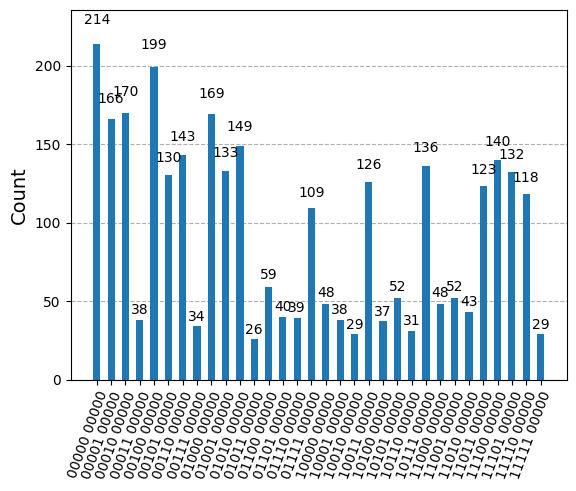

In [76]:
from revkit import netlist, oracle_synth, truth_table
import revkit.export.qiskit

qc = QuantumCircuit(5,5)

tt_bool = revkit.truth_table.from_expression("[(ab)(cd)]") # (a ∧ b) ⊕ (c ∧ d)
oracle = revkit.oracle_synth(tt_bool)

oracle_gate = oracle.to_qiskit().to_gate()

qc.h(0)
qc.h(1)
# qc.cx(0, 1)
qc.h(2)
# qc.x(3)
# qc.h(2)
qc.h(3)
qc.append(oracle_gate, [0, 1, 2, 3, 4])
qc.measure_all()

optimization_level = 1
backend = qiskit_aer.AerSimulator.from_backend(FakeVigo())
pm2 = generate_preset_pass_manager(backend=backend, optimization_level=optimization_level)

qct = pm2.run(qc)

job = backend.run(qct, shots=3000)
histo(job.result().get_counts())

In [67]:
job.result().get_counts()

{'10010 00000': 44,
 '11001 00000': 38,
 '10110 00000': 49,
 '10101 00000': 43,
 '11100 00000': 139,
 '11010 00000': 41,
 '10011 00000': 122,
 '01110 00000': 46,
 '00001 00000': 165,
 '10001 00000': 35,
 '01101 00000': 51,
 '01001 00000': 134,
 '11000 00000': 34,
 '10111 00000': 122,
 '01111 00000': 113,
 '00101 00000': 114,
 '10000 00000': 30,
 '01010 00000': 157,
 '11101 00000': 138,
 '00110 00000': 163,
 '11011 00000': 122,
 '01000 00000': 185,
 '00111 00000': 50,
 '01100 00000': 44,
 '11110 00000': 126,
 '01011 00000': 35,
 '00100 00000': 169,
 '00000 00000': 209,
 '10100 00000': 50,
 '11111 00000': 29,
 '00011 00000': 33,
 '00010 00000': 170}

In [80]:
 oracle.to_qiskit().draw()

┌────────────┐                                                          »
qr_0: ┤ Rz(0.3927) ├────────────────■──────────────────────────────────────■──»
      ├────────────┤                │                                      │  »
qr_1: ┤ Rz(0.3927) ├────────────────┼───────────────────■──────────────────┼──»
      ├────────────┤                │                   │                  │  »
qr_2: ┤ Rz(0.3927) ├────────────────┼───────────────────┼──────────────────┼──»
      ├────────────┤                │                   │                  │  »
qr_3: ┤ Rz(0.3927) ├────────────────┼───────────────────┼──────────────────┼──»
      └───┬───┬────┘┌────────────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────────────┐┌─┴─┐»
qr_4: ────┤ H ├─────┤ Rz(1.1781) ├┤ X ├┤ Rz(-0.3927) ├┤ X ├┤ Rz(0.3927) ├┤ X ├»
          └───┘     └────────────┘└───┘└─────────────┘└───┘└────────────┘└───┘»
«                                                                 »
«qr_0: ─────────────────────────────────────■─────────────────────»
«                                           │                     »
«qr_1: ─────────────────────────────────────┼──────────────────■──»
«                                           │                  │  »
«qr_2: ─────────────────■───────────────────┼──────────────────┼──»
«                       │                   │                  │  »
«qr_3: ─────────────────┼───────────────────┼──────────────────┼──»
«      ┌─────────────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────────────┐┌─┴─┐»
«qr_4: ┤ Rz(-0.3927) ├┤ X ├┤ Rz(-0.3927) ├┤ X ├┤ Rz(0.3927) ├┤ X ├»
«      └─────────────┘└───┘└─────────────┘└───┘└────────────┘└───┘»
«                                                                 »
«qr_0: ─────────────────■──────────────────────────────────────■──»
«                       │                                      │  »
«qr_1: ─────────────────┼──────────────────────────────────────┼──»
«                       │                                      │  »
«qr_2: ─────────────────┼──────────────────────────────────────┼──»
«                       │                                      │  »
«qr_3: ─────────────────┼───────────────────■──────────────────┼──»
«      ┌─────────────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────────────┐┌─┴─┐»
«qr_4: ┤ Rz(-0.3927) ├┤ X ├┤ Rz(-0.3927) ├┤ X ├┤ Rz(0.3927) ├┤ X ├»
«      └─────────────┘└───┘└─────────────┘└───┘└────────────┘└───┘»
«                                                                »
«qr_0: ────────────────────────────────────■─────────────────────»
«                                          │                     »
«qr_1: ────────────────■───────────────────┼─────────────────────»
«                      │                   │                     »
«qr_2: ────────────────┼───────────────────┼──────────────────■──»
«                      │                   │                  │  »
«qr_3: ────────────────┼───────────────────┼──────────────────┼──»
«      ┌────────────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────────────┐┌─┴─┐»
«qr_4: ┤ Rz(0.3927) ├┤ X ├┤ Rz(-0.3927) ├┤ X ├┤ Rz(0.3927) ├┤ X ├»
«      └────────────┘└───┘└─────────────┘└───┘└────────────┘└───┘»
«                                                                 »
«qr_0: ─────────────────■──────────────────────────────────────■──»
«                       │                                      │  »
«qr_1: ─────────────────┼──────────────────■───────────────────┼──»
«                       │                  │                   │  »
«qr_2: ─────────────────┼──────────────────┼───────────────────┼──»
«                       │                  │                   │  »
«qr_3: ─────────────────┼──────────────────┼───────────────────┼──»
«      ┌─────────────┐┌─┴─┐┌────────────┐┌─┴─┐┌─────────────┐┌─┴─┐»
«qr_4: ┤ Rz(-0.3927) ├┤ X ├┤ Rz(0.3927) ├┤ X ├┤ Rz(-0.3927) ├┤ X ├»
«      └─────────────┘└───┘└────────────┘└───┘└─────────────┘└───┘»
«                                                                      »
«qr_0: ──────────────────────■──────────────────────────────────────■──»

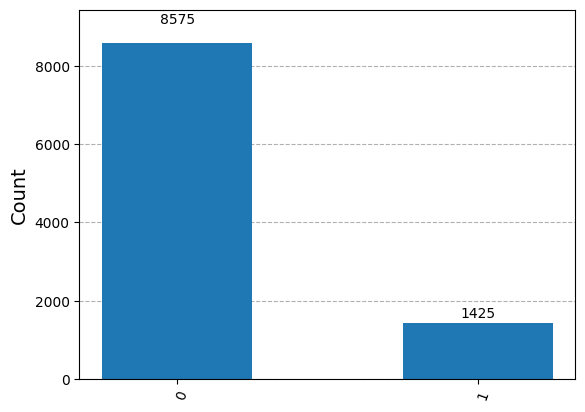

In [173]:
qc_a = QuantumCircuit(1, 1)
# qc_a.h(1)
qc_a.ry(math.pi/1.5, 0)
qc_a.h(0)
# qc_a.ch(0, 1)
# qc_a.h(1)
# qc_a.h(1)
# qc_a.rx(math.pi*2, 0)
# qc_a.rz(math.pi/4, 1)
qc_a.measure([0], [0])

optimization_level = 1
backend = qiskit_aer.AerSimulator.from_backend(FakeVigo())
pm2 = generate_preset_pass_manager(backend=backend, optimization_level=optimization_level)

qca_trans = pm2.run(qc_a)

job = backend.run(qca_trans, shots=10000)
histo(job.result().get_counts())

In [147]:
qca_trans.draw()

global phase: 7π/4
               ┌─────────┐┌────┐┌─────────┐                 ┌─┐         
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├───■─────────────┤M├─────────
               └┬────────┤├────┤├─────────┴┐┌─┴─┐┌─────────┐└╥┘┌────┐┌─┐
      q_1 -> 1 ─┤ Rz(-π) ├┤ √X ├┤ Rz(3π/4) ├┤ X ├┤ Rz(π/4) ├─╫─┤ √X ├┤M├
                └────────┘└────┘└──────────┘└───┘└─────────┘ ║ └────┘└╥┘
ancilla_0 -> 2 ──────────────────────────────────────────────╫────────╫─
                                                             ║        ║ 
ancilla_1 -> 3 ──────────────────────────────────────────────╫────────╫─
                                                             ║        ║ 
ancilla_2 -> 4 ──────────────────────────────────────────────╫────────╫─
                                                             ║        ║ 
          c: 2/══════════════════════════════════════════════╩════════╩═
                                                             0        1

In [148]:
qc_a.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ H ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [150]:
from qiskit.algorithm import Grover
from qiskit.primitives import Sampler
 
grover = Grover(sampler=Sampler())

ModuleNotFoundError: No module named 'qiskit.algorithm'

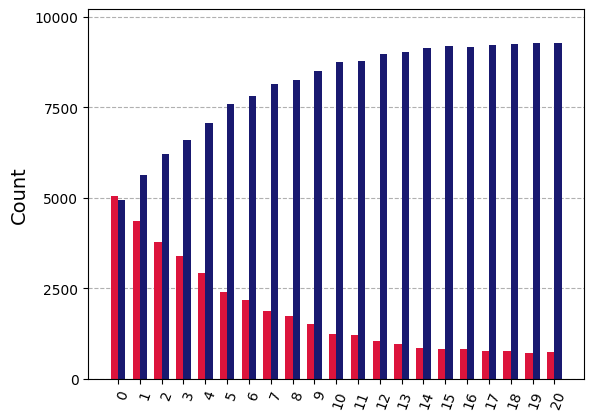

In [453]:
# optimization_level = 1
# backend = qiskit_aer.AerSimulator.from_backend(FakeVigo())
# pm2 = generate_preset_pass_manager(backend=backend, optimization_level=optimization_level)

n = 20
records0 = {}
records1 = {}
records2 = {}
for i in range(n+1):
    qc_a = QuantumCircuit(1, 1)
    qc_a.h(0)
    qc_a.ry(math.pi/(1+i/n), 0)
    
    qc_a.measure([0], [0])
    qca_trans = pm2.run(qc_a)
    job = backend.run(qca_trans, shots=10000)
    cnt = job.result().get_counts()
    records0[i] = cnt["0"]
    records1[i] = cnt["1"]
    records2[i] = cnt["0"] / (cnt["0"] + cnt["1"])
histo([records0, records1], bar_labels=False, color=['crimson','midnightblue'])

# histo(records2, bar_labels=False, color=['crimson','midnightblue'])

In [470]:
def getprobcirc(probs):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.ry(math.pi * probs[0], 0)
    qc.ry(math.pi * probs[1], 1)
    # qc.h(1)
    # qc.x(1)
    qc.measure([0,1], [0,1])
    qct = pm2.run(qc)
    job = backend.run(qct, shots=10000)
    cnt = job.result().get_counts()
    return histo(cnt)

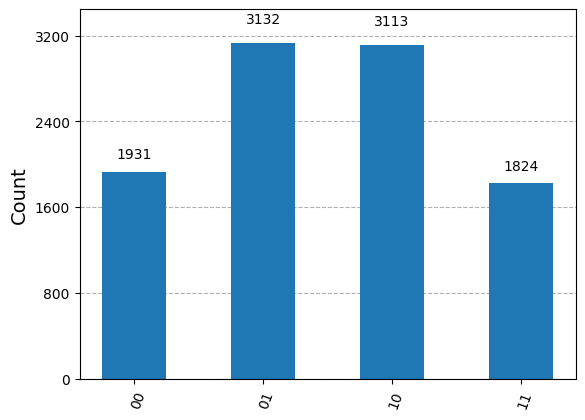

In [474]:
getprobcirc([0.4, 1])

In [465]:
(5634+2809)/10000

0.8443

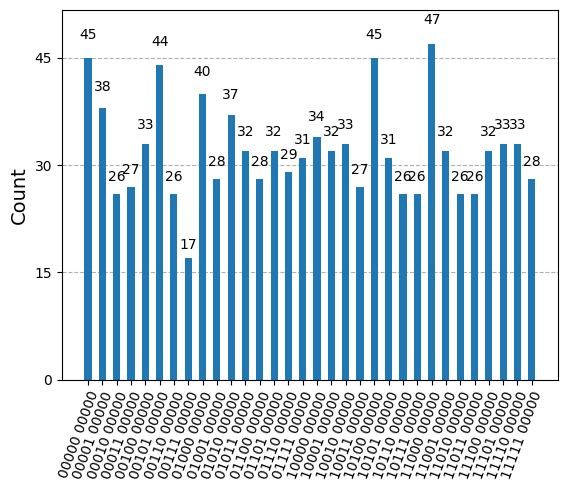

In [483]:
from qiskit.circuit.library import QFT
qft = QFT(5).to_gate()

qcb = QuantumCircuit(5,5)
qcb.append(qft, [0, 1, 2, 3, 4])
qcb.measure_all()
qcb_t = pm2.run(qcb)

job = backend.run(qcb_t)
cnt = job.result().get_counts()
histo(cnt)

global phase: π/64
                                                                              »
q_1 -> 0 ─────────────────────────────────────────────────────────────────────»
         ┌─────────┐┌────┐┌──────────┐                      ┌─────────┐       »
q_4 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(3π/4) ├──■────────────────■──┤ Rz(π/8) ├───■───»
         └─────────┘└────┘└──────────┘  │                │  └─────────┘ ┌─┴─┐ »
q_2 -> 2 ───────────────────────────────┼────────────────┼──────────────┤ X ├─»
                                      ┌─┴─┐┌──────────┐┌─┴─┐┌──────────┐├───┴┐»
q_3 -> 3 ─────────────────────────────┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(3π/4) ├┤ √X ├»
                                      └───┘└──────────┘└───┘└──────────┘└────┘»
q_0 -> 4 ─────────────────────────────────────────────────────────────────────»
                                                                              »
    c: 5/═════════════════════════════════════════════════════════════════════»
                                                                              »
 meas: 5/═════════════════════════════════════════════════════════════════════»
                                                                              »
«                                      ┌───┐┌───────────┐┌───┐┌──────────┐     »
«q_1 -> 0 ─────────────────────────────┤ X ├┤ Rz(-π/16) ├┤ X ├┤ Rz(π/16) ├─────»
«                          ┌──────────┐└─┬─┘└───────────┘└─┬─┘└──────────┘┌───┐»
«q_4 -> 1 ──────────────■──┤ Rz(π/16) ├──■─────────────────■───────■──────┤ X ├»
«         ┌──────────┐┌─┴─┐├─────────┬┘                            │      └─┬─┘»
«q_2 -> 2 ┤ Rz(-π/8) ├┤ X ├┤ Rz(π/8) ├─────────────────────────────┼────────┼──»
«         ├─────────┬┘└───┘└─────────┘                           ┌─┴─┐      │  »
«q_3 -> 3 ┤ Rz(π/2) ├────────────────────────────────────────────┤ X ├──────■──»
«         └─────────┘                                            └───┘         »
«q_0 -> 4 ─────────────────────────────────────────────────────────────────────»
«                                                                              »
«    c: 5/═════════════════════════════════════════════════════════════════════»
«                                                                              »
« meas: 5/═════════════════════════════════════════════════════════════════════»
«                                                                              »
«                                                             ┌───┐ »
«q_1 -> 0 ────────────────────────────────────────────────────┤ X ├─»
«              ┌─────────┐                        ┌─────────┐ └─┬─┘ »
«q_4 -> 1 ──■──┤ Rz(π/4) ├───■─────────────────■──┤ Rz(π/8) ├───■───»
«           │  └─────────┘ ┌─┴─┐ ┌──────────┐┌─┴─┐├─────────┴┐┌────┐»
«q_2 -> 2 ──┼──────────────┤ X ├─┤ Rz(-π/4) ├┤ X ├┤ Rz(3π/4) ├┤ √X ├»
«         ┌─┴─┐┌──────────┐└───┘ └──────────┘└───┘└──────────┘├───┬┘»
«q_3 -> 3 ┤ X ├┤ Rz(π/32) ├──■─────────────────■──────────────┤ X ├─»
«         └───┘└──────────┘┌─┴─┐┌───────────┐┌─┴─┐┌──────────┐└─┬─┘ »
«q_0 -> 4 ─────────────────┤ X ├┤ Rz(-π/32) ├┤ X ├┤ Rz(π/32) ├──■───»
«                          └───┘└───────────┘└───┘└──────────┘      »
«    c: 5/══════════════════════════════════════════════════════════»
«                                                                   »
« meas: 5/══════════════════════════════════════════════════════════»
«                                                                   »
«         ┌──────────┐┌───┐┌─────────┐                                    ┌───┐»
«q_1 -> 0 ┤ Rz(-π/8) ├┤ X ├┤ Rz(π/8) ├─────────────────────────────■──────┤ X ├»
«         └──────────┘└─┬─┘├─────────┴┐                          ┌─┴─┐    └─┬─┘»
«q_4 -> 1 ──────────────■──┤ Rz(π/16) ├──■─────────────────■─────┤ X ├──────■──»
«         ┌──────────┐     └──────────┘  │                 │     └───┘         »
«q_2 -> 2 ┤ Rz(3π/4) ├───────────────────┼─────────────────┼───────────────────»
«         └──────────┘┌───┐   